In [ ]:
import geopandas as gpd

level = 'communes'
search = 'hag'

gdf_communes = gpd.read_file("../data/raster-dl.gpkg", layer=level)
communes = gdf_communes[gdf_communes['nom_com'].str.lower().str.contains(search)]
communes[['nom_com', 'insee_com']]

In [ ]:

code = '67186'
buffer = 500

commune = gdf_communes[gdf_communes['insee_com'] == code]
commune = commune[['geometry', 'insee_com', 'nom_com']]
commune['geometry']= commune.buffer(buffer)

commune[['nom_com', 'insee_com']]


In [ ]:
commune.plot(cmap='Greens', edgecolor='black', alpha=0.5)

In [ ]:
gdf_dalles = gpd.read_file("../data/raster-dl.gpkg", layer='dalles_ortho_67')
dalles = gdf_dalles[['geometry', 'FILE_IMG']]

dalles_seleted = gpd.sjoin(dalles, commune, how='inner', predicate='intersects')
# dalles_seleted.plot(cmap='Greens', edgecolor='black', alpha=0.5)

# a.head(2)
nb_dalles = len(dalles_seleted)
print('Nombre de dalles:', nb_dalles)

dalles_seleted[['FILE_IMG', 'insee_com']]


In [ ]:

# a.explore("FILE_IMG", cmap=["red"], popup=True, tooltip="FILE_IMG", legend=False, width=600, height=400, tiles="Stamen Terrain")._repr_html_()
dalles_seleted.explore("FILE_IMG", cmap=["red"], popup=True, tooltip="FILE_IMG", legend=False, width=800, height=400, tiles="Stamen Terrain")

In [1]:
import geopandas as gpd
from shapely.validation import explain_validity

# absolute_path_to_file = 'P:/Test/qgis_test/lines_test.shp'
layer = gpd.read_file("../data/raster-dl.gpkg", layer='pnr')
# shp = gpd.read_file(absolute_path_to_file)

layer['validity'] = layer.apply(lambda row: explain_validity(row.geometry), axis=1)

print(layer)

   code                name  date_premi  date_derni  date_fin_c prolongati  \
0     5  BALLONS des VOSGES        None  2012-05-02  2024-05-04       None   
1    24            LORRAINE  27-01-2015  2015-01-27  2027-01-29       None   
2    30   MONTAGNE de REIMS  29-06-1976  2009-05-04  2021-04-18       None   
3    48      VOSGES du NORD        None  2014-03-14  2026-03-17       None   
4     2            ARDENNES  21-12-2011  2011-12-21  2023-12-21       None   
5    14      FORET d'ORIENT        None  2010-06-11  2021-04-02       None   

   date_maj_d                                           geometry  \
0  2012-10-16  MULTIPOLYGON (((6.60510 47.65818, 6.60542 47.6...   
1  2015-02-05  MULTIPOLYGON (((6.76278 48.65561, 6.76252 48.6...   
2  2012-09-01  MULTIPOLYGON (((4.19553 49.14664, 4.19574 49.1...   
3  2014-08-27  MULTIPOLYGON (((7.24248 48.75571, 7.24285 48.7...   
4  2012-10-18  MULTIPOLYGON (((4.23179 49.73104, 4.22936 49.7...   
5  2012-09-11  MULTIPOLYGON (((4.32271 48.209

In [3]:
import geopandas as gpd
from shapely.validation import make_valid

layer = gpd.read_file("../data/raster-dl.gpkg", layer='pnr')

layer.geometry = layer.apply(lambda row: make_valid(row.geometry) if not row.geometry.is_valid else row.geometry, axis=1)

layer.to_file("../data/raster-dl.gpkg", layer='pnr2', driver="GPKG")

print(layer)

   code                name  date_premi  date_derni  date_fin_c prolongati  \
0     5  BALLONS des VOSGES        None  2012-05-02  2024-05-04       None   
1    24            LORRAINE  27-01-2015  2015-01-27  2027-01-29       None   
2    30   MONTAGNE de REIMS  29-06-1976  2009-05-04  2021-04-18       None   
3    48      VOSGES du NORD        None  2014-03-14  2026-03-17       None   
4     2            ARDENNES  21-12-2011  2011-12-21  2023-12-21       None   
5    14      FORET d'ORIENT        None  2010-06-11  2021-04-02       None   

   date_maj_d                                           geometry  
0  2012-10-16  MULTIPOLYGON (((6.60510 47.65818, 6.60542 47.6...  
1  2015-02-05  MULTIPOLYGON (((6.76278 48.65561, 6.76252 48.6...  
2  2012-09-01  MULTIPOLYGON (((4.19553 49.14664, 4.19574 49.1...  
3  2014-08-27  MULTIPOLYGON (((7.24248 48.75571, 7.24285 48.7...  
4  2012-10-18  MULTIPOLYGON (((4.23179 49.73104, 4.22936 49.7...  
5  2012-09-11  MULTIPOLYGON (((4.32271 48.20992, 4.

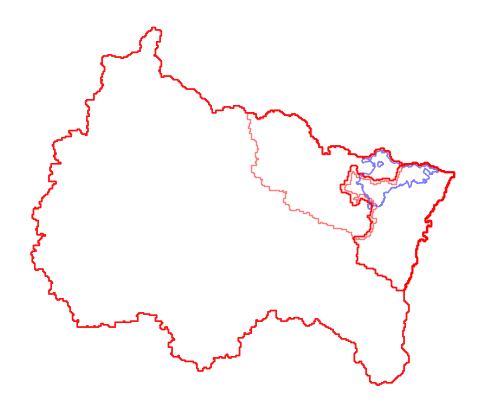

In [102]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.validation import make_valid

gdf_level = gpd.read_file("../data/raster-dl.gpkg", layer='pnr')
level_feature = gdf_level[gdf_level['code'] == 48]
level_feature = level_feature[['geometry', 'code', 'name']]
        
# if bbox:
#     bbox_feature = get_bbox(level_feature, buffer)
#     extent = bbox_feature    
# else:
#     level_feature['geometry']= level_feature.buffer(int(buffer))
#     bbox_feature = get_bbox(level_feature)
#     extent = level_feature
extent = level_feature
# extent.plot(cmap='Greens',edgecolor='black', alpha=0.5)
# print(extent)

gdf_products = gpd.read_file("../data/raster-dl.gpkg", layer='products')
# products_seleted = gpd.overlay(gdf_products, extent, how='difference')
# products_seleted = gpd.overlay(extent, gdf_products, how='intersection')
products_seleted = gpd.sjoin(gdf_products, extent, how='inner', predicate='intersects')
# products_seleted = gpd.sjoin(extent, gdf_products, how='right', predicate='contains')
# products_seleted = gpd.sjoin(extent, gdf_products, how='right', predicate='within')
# products_seleted = gpd.sjoin(extent, gdf_products, how='right', predicate='touches')
# products_seleted = gpd.sjoin(extent, gdf_products, how='right', predicate='crosses')
# products_seleted = gpd.sjoin(extent, gdf_products, how='right', predicate='overlaps')
# products_seleted['code'] = products_seleted['code_left']
# products_seleted = products_seleted[['code', 'data_extent', 'data_product', 'data_date', 'data_resolution', 'data_compression', 'data_type', 'metadata_url', 'data_directory', 'data_url', 'layer_tiles', 'parent']]
# products_seleted = products_seleted[products_seleted['code_right'] == 48]

# products_seleted.head(50)

# products_seleted.plot(cmap='Greens', alpha=0.5)
# Generate plot map
fig = plt.figure(figsize=(6, 6))
spec = fig.add_gridspec(ncols=1, nrows=1)
plot_map = fig.add_subplot(spec[0, 0])
# fig.suptitle('Selection des produits sur {extent}'.format(extent=extent.iloc[0]['name']))
extent.plot(facecolor='None', edgecolor='blue', alpha=0.5, ax=plot_map)
products_seleted.plot(facecolor='None', edgecolor='red', alpha=0.5, ax=plot_map)
plt.axis('off')
# plt.savefig('./web/products.png')
plt.show()